In [1]:
#Package Import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

In [2]:
data=pd.read_csv('./data/bank-full.csv', sep=';', quotechar='"')
data
#年齡、職業、婚姻狀況、教育水平、信用違約紀錄、帳戶餘額、房貸、個人貸款  (個人銀行資訊)
#聯繫方式、上一次聯繫日、月 、本次聯繫秒數 (上一次連絡相關資訊)
#本次行銷活動聯繫次數、距離上一次行銷活動後的天數、之前行銷活動聯絡次數、之前行銷活動結果 (其他屬性)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Data Visualization

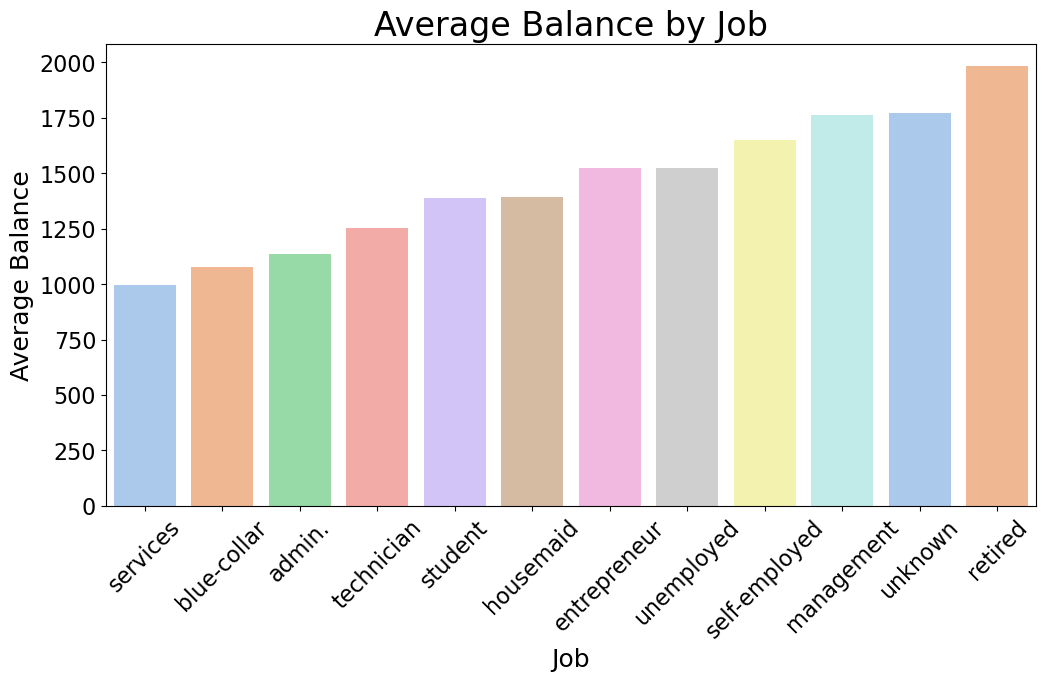

In [3]:
average_balance = data.groupby('job')['balance'].mean().sort_values() 
custom_palette = ['#FF6347', '#4682B4', '#FFD700', '#6A5ACD', '#FF69B4']

plt.figure(figsize=(12, 6))
sns.barplot(x=average_balance.index, y=average_balance.values ,hue=average_balance.values, palette='pastel',legend=False)
plt.xlabel('Job',fontsize=18)
plt.ylabel('Average Balance',fontsize=18)
plt.title('Average Balance by Job',fontsize=24)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

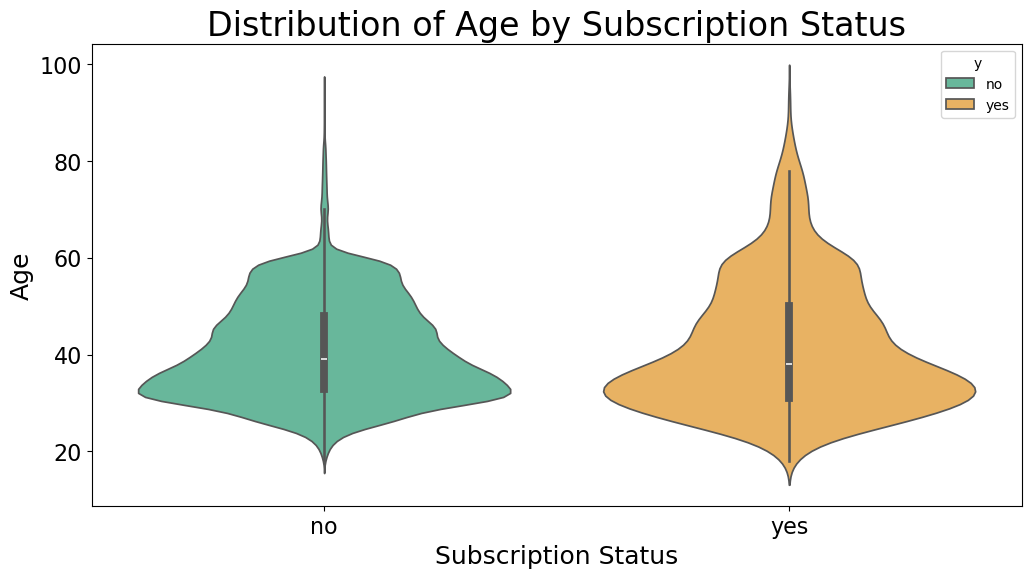

In [4]:
plt.figure(figsize=(12, 6))
custom_palette = {'yes':'#FEB64D', 'no':'#5BC49F'}

sns.violinplot(x='y', y='age', hue='y' , data=data, palette=custom_palette, dodge=False, legend=True)
plt.xlabel('Subscription Status',fontsize=18)
plt.ylabel('Age',fontsize=18)
plt.title('Distribution of Age by Subscription Status',fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

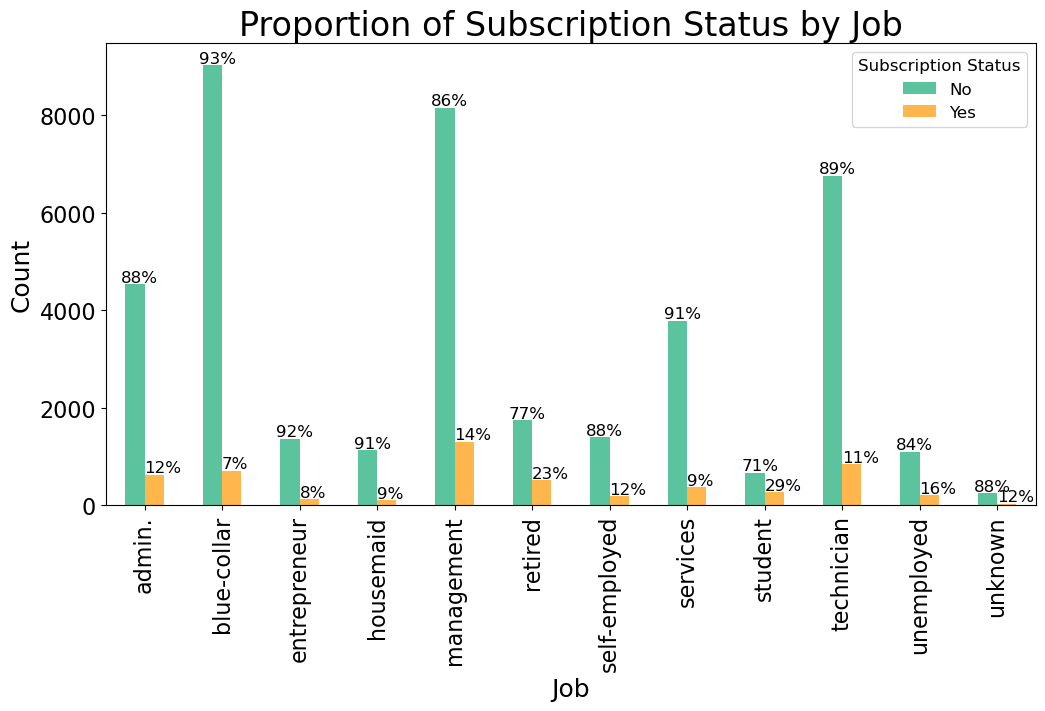

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

job_y_counts = data.groupby(['job', 'y']).size().unstack(fill_value=0)
job_y_ratio = job_y_counts.div(job_y_counts.sum(axis=1), axis=0)

ax = job_y_counts.plot(kind='bar', stacked=False, color=['#5BC49F', '#FEB64D'], figsize=(12, 6))

for i, (index, row) in enumerate(job_y_counts.iterrows()):
    y_yes = row['yes']
    y_no = row['no']
    percentage_yes = job_y_ratio.loc[index, 'yes'] * 100
    percentage_no = job_y_ratio.loc[index, 'no'] * 100
    
    plt.text(i , y_yes+50, f'{percentage_yes:.0f}%', color='black', fontsize=12)
    plt.text(i-0.3 , y_no+50 , f'{percentage_no:.0f}%', color='black', fontsize=12)

plt.xlabel('Job', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Proportion of Subscription Status by Job', fontsize=24)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['No', 'Yes'], title='Subscription Status', title_fontsize='12', fontsize='12')
plt.show()


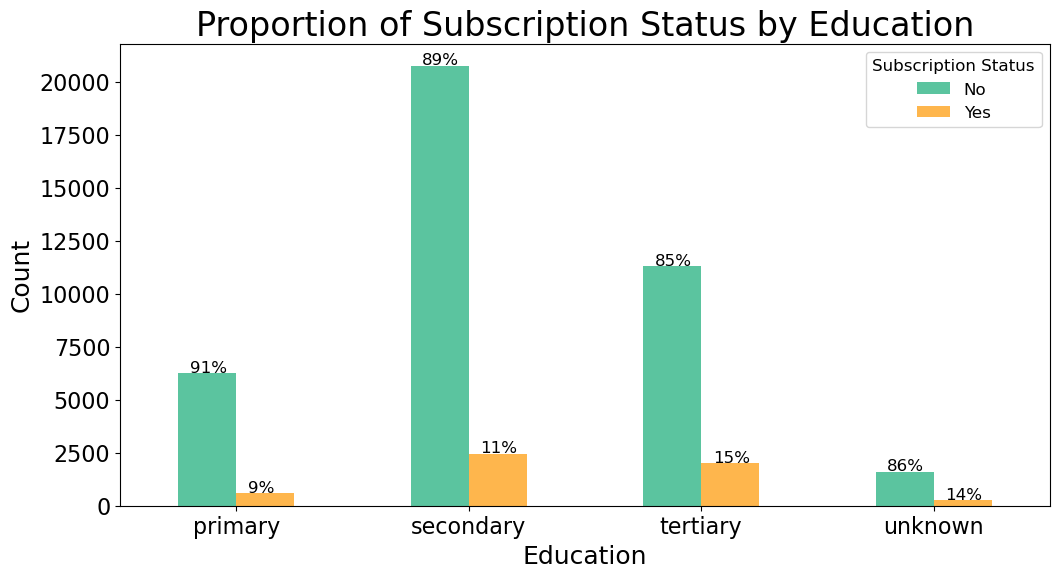

In [6]:
job_y_counts = data.groupby(['education', 'y']).size().unstack(fill_value=0)
job_y_ratio = job_y_counts.div(job_y_counts.sum(axis=1), axis=0)

job_y_counts.plot(kind='bar', stacked=False, color=['#5BC49F', '#FEB64D'], figsize=(12, 6))

#add ratio on bar
for i, (index, row) in enumerate(job_y_counts.iterrows()):
    y_yes = row['yes']
    y_no = row['no']
    percentage_yes = job_y_ratio.loc[index, 'yes'] * 100
    percentage_no = job_y_ratio.loc[index, 'no'] * 100
    
    plt.text(i+0.05 , y_yes+50, f'{percentage_yes:.0f}%', color='black', fontsize=12)
    plt.text(i-0.2 , y_no+50 , f'{percentage_no:.0f}%', color='black', fontsize=12)

plt.xlabel('Education', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Proportion of Subscription Status by Education', fontsize=24)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['No', 'Yes'], title='Subscription Status', title_fontsize='12', fontsize='12')
plt.show()


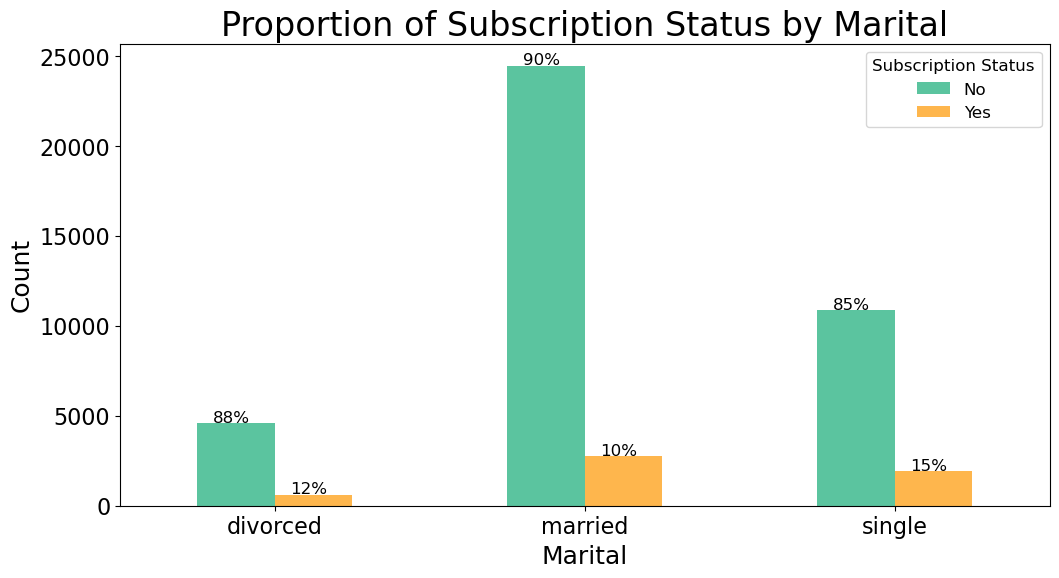

In [7]:
job_y_counts = data.groupby(['marital', 'y']).size().unstack(fill_value=0)
job_y_ratio = job_y_counts.div(job_y_counts.sum(axis=1), axis=0)

job_y_counts.plot(kind='bar', stacked=False, color=['#5BC49F', '#FEB64D'], figsize=(12, 6))

#add ratio on bar
for i, (index, row) in enumerate(job_y_counts.iterrows()):
    y_yes = row['yes']
    y_no = row['no']
    percentage_yes, percentage_no = job_y_ratio.loc[index, 'yes'] * 100, job_y_ratio.loc[index, 'no'] * 100
    
    plt.text(i+0.05 , y_yes+50, f'{percentage_yes:.0f}%', color='black', fontsize=12)
    plt.text(i-0.2 , y_no+50 , f'{percentage_no:.0f}%', color='black', fontsize=12)
    
plt.xlabel('Marital', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Proportion of Subscription Status by Marital', fontsize=24)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['No', 'Yes'], title='Subscription Status', title_fontsize='12', fontsize='12')
plt.show()


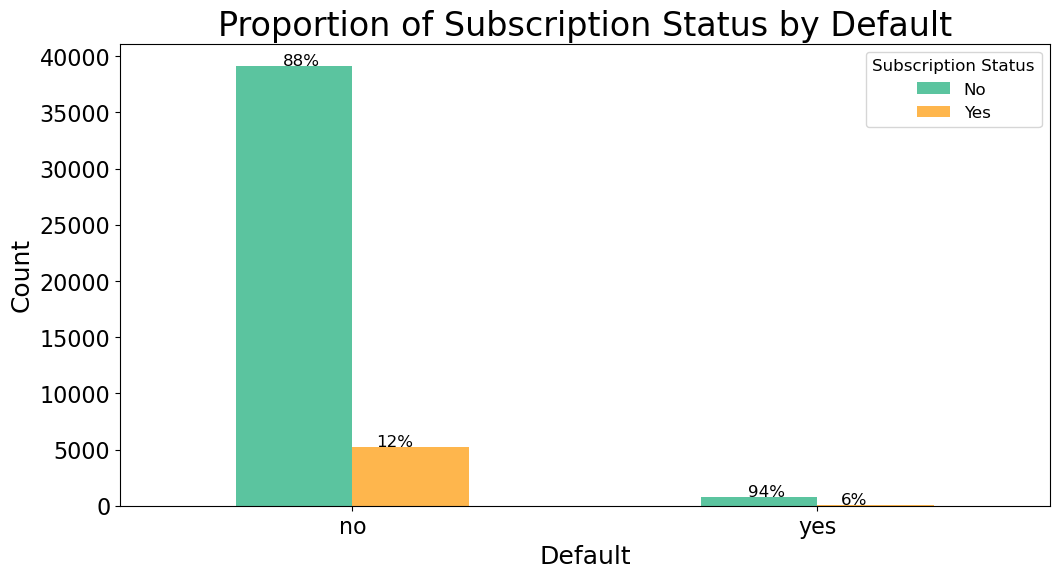

In [8]:
job_y_counts = data.groupby(['default', 'y']).size().unstack(fill_value=0)
job_y_ratio = job_y_counts.div(job_y_counts.sum(axis=1), axis=0)

job_y_counts.plot(kind='bar', stacked=False, color=['#5BC49F', '#FEB64D'], figsize=(12, 6))

#add ratio on bar
for i, (index, row) in enumerate(job_y_counts.iterrows()):
    y_yes = row['yes']
    y_no = row['no']
    percentage_yes, percentage_no = job_y_ratio.loc[index, 'yes'] * 100, job_y_ratio.loc[index, 'no'] * 100
    
    plt.text(i+0.05 , y_yes+50, f'{percentage_yes:.0f}%', color='black', fontsize=12)
    plt.text(i-0.15 , y_no+50 , f'{percentage_no:.0f}%', color='black', fontsize=12)
    
plt.xlabel('Default', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Proportion of Subscription Status by Default', fontsize=24)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['No', 'Yes'], title='Subscription Status', title_fontsize='12', fontsize='12')
plt.show()


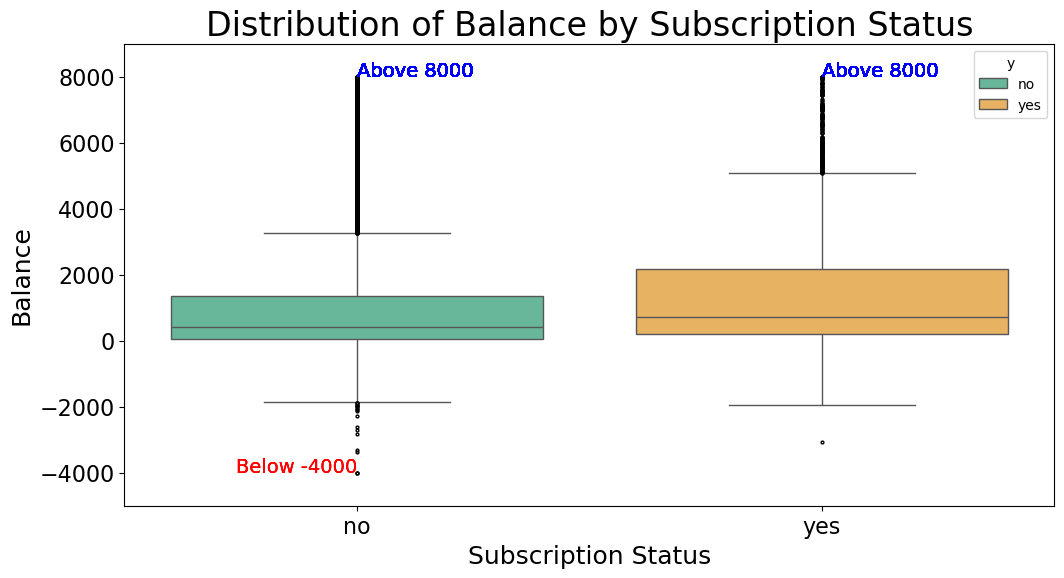

In [9]:
#Distribution of Balance by Subscription Status
upper_limit = 8000
lower_limit = -4000
dummy_data=data.copy(deep=True)
dummy_data['balance_capped'] = dummy_data['balance'].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
flierprops = dict(marker='o', markersize=2, linestyle='none', markeredgecolor='black') 

plt.figure(figsize=(12, 6))
custom_palette = {'yes':'#FEB64D', 'no':'#5BC49F'}
sns.boxplot(x='y', y='balance_capped', hue='y',data=dummy_data, palette=custom_palette, dodge=False, legend=True, flierprops=flierprops)
plt.title('Distribution of Balance by Subscription Status', fontsize=24)
plt.xlabel('Subscription Status', fontsize=18)
plt.ylabel('Balance', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#upper bound、lower bound
for tick, label in zip(range(len(dummy_data['y'].unique())), dummy_data['y'].unique()):
    subset = dummy_data[dummy_data['y'] == label]
    
    for i in subset.index:
        if subset.loc[i, 'balance'] > upper_limit:
            plt.text(tick, upper_limit, 'Above 8000', horizontalalignment='left', size='14', color='blue')
        elif subset.loc[i, 'balance'] < lower_limit:
            plt.text(tick, lower_limit, 'Below -4000', horizontalalignment='right', size='14', color='red')
            

plt.ylim(lower_limit - 1000, upper_limit + 1000)  
plt.show()


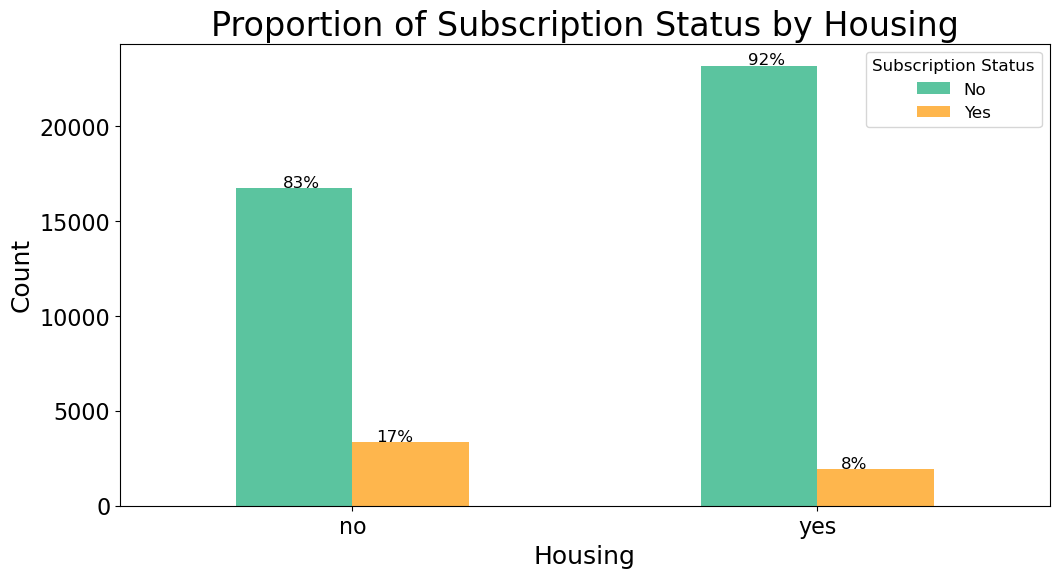

In [10]:
job_y_counts = data.groupby(['housing', 'y']).size().unstack(fill_value=0)
job_y_ratio = job_y_counts.div(job_y_counts.sum(axis=1), axis=0)

job_y_counts.plot(kind='bar', stacked=False, color=['#5BC49F', '#FEB64D'], figsize=(12, 6))

#add ratio on bar
for i, (index, row) in enumerate(job_y_counts.iterrows()):
    y_yes = row['yes']
    y_no = row['no']
    percentage_yes, percentage_no = job_y_ratio.loc[index, 'yes'] * 100, job_y_ratio.loc[index, 'no'] * 100
    
    plt.text(i+0.05 , y_yes+50, f'{percentage_yes:.0f}%', color='black', fontsize=12)
    plt.text(i-0.15 , y_no+50 , f'{percentage_no:.0f}%', color='black', fontsize=12)
    
plt.xlabel('Housing', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Proportion of Subscription Status by Housing', fontsize=24)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['No', 'Yes'], title='Subscription Status', title_fontsize='12', fontsize='12')
plt.show()


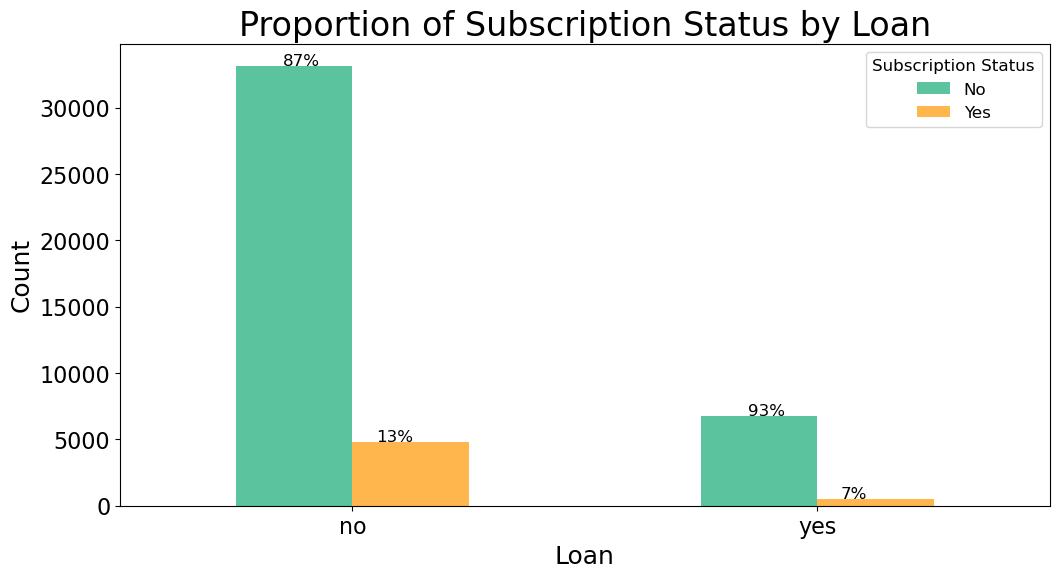

In [11]:
job_y_counts = data.groupby(['loan', 'y']).size().unstack(fill_value=0)
job_y_ratio = job_y_counts.div(job_y_counts.sum(axis=1), axis=0)

job_y_counts.plot(kind='bar', stacked=False, color=['#5BC49F', '#FEB64D'], figsize=(12, 6))

#add ratio on bar
for i, (index, row) in enumerate(job_y_counts.iterrows()):
    y_yes = row['yes']
    y_no = row['no']
    percentage_yes, percentage_no = job_y_ratio.loc[index, 'yes'] * 100, job_y_ratio.loc[index, 'no'] * 100
    
    plt.text(i+0.05 , y_yes+50, f'{percentage_yes:.0f}%', color='black', fontsize=12)
    plt.text(i-0.15 , y_no+50 , f'{percentage_no:.0f}%', color='black', fontsize=12)
    
plt.xlabel('Loan', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Proportion of Subscription Status by Loan', fontsize=24)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['No', 'Yes'], title='Subscription Status', title_fontsize='12', fontsize='12')
plt.show()


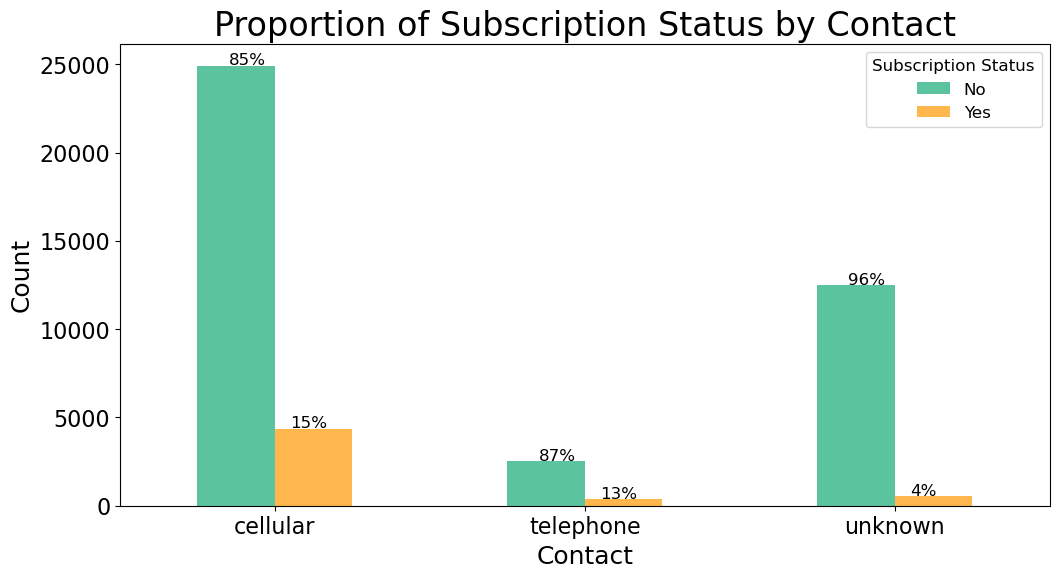

In [12]:
job_y_counts = data.groupby(['contact', 'y']).size().unstack(fill_value=0)
job_y_ratio = job_y_counts.div(job_y_counts.sum(axis=1), axis=0)

job_y_counts.plot(kind='bar', stacked=False, color=['#5BC49F', '#FEB64D'], figsize=(12, 6))

#add ratio on bar
for i, (index, row) in enumerate(job_y_counts.iterrows()):
    y_yes = row['yes']
    y_no = row['no']
    percentage_yes, percentage_no = job_y_ratio.loc[index, 'yes'] * 100, job_y_ratio.loc[index, 'no'] * 100
    
    plt.text(i+0.05 , y_yes+50, f'{percentage_yes:.0f}%', color='black', fontsize=12)
    plt.text(i-0.15 , y_no+50 , f'{percentage_no:.0f}%', color='black', fontsize=12)
    
plt.xlabel('Contact', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Proportion of Subscription Status by Contact', fontsize=24)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['No', 'Yes'], title='Subscription Status', title_fontsize='12', fontsize='12')
plt.show()


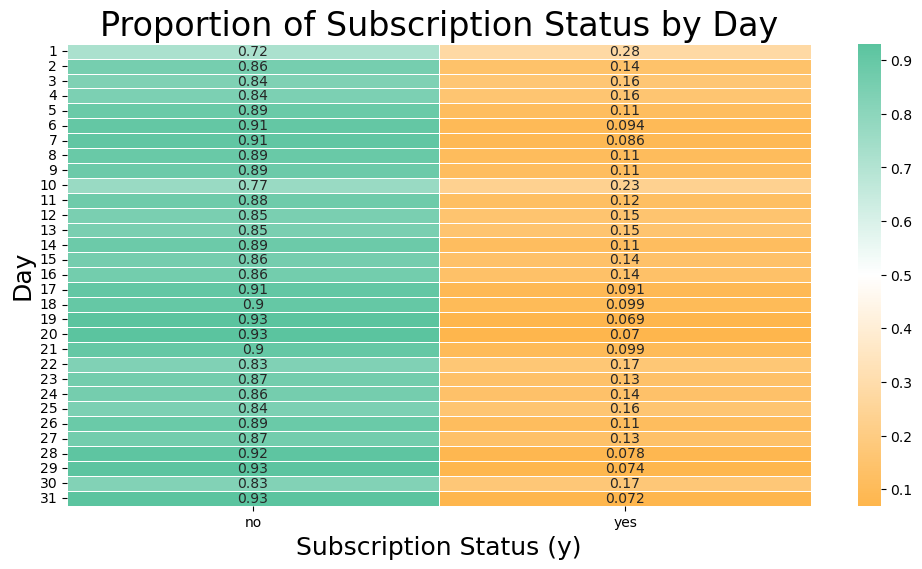

In [13]:
job_y_counts = data.groupby(['day', 'y']).size().unstack(fill_value=0)
job_y_frequencies = job_y_counts.div(job_y_counts.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#FEB64D', 'white', '#5BC49F'])
sns.heatmap(job_y_frequencies, annot=True, cmap=custom_cmap, cbar=True, linewidths=0.5)
plt.xlabel('Subscription Status (y)', fontsize=18)
plt.ylabel('Day', fontsize=18)

plt.title('Proportion of Subscription Status by Day', fontsize=24)
plt.show()


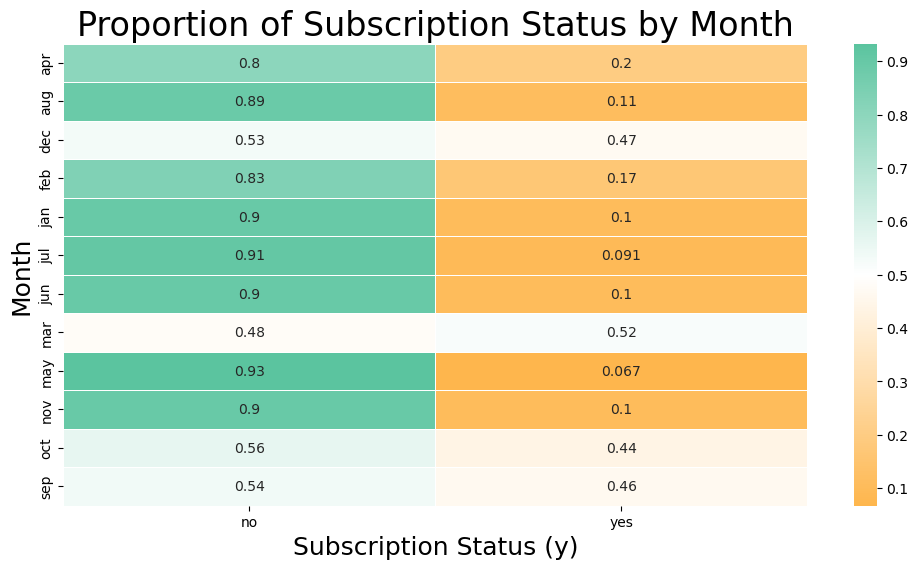

In [4]:
job_y_counts = data.groupby(['month', 'y']).size().unstack(fill_value=0)
job_y_frequencies = job_y_counts.div(job_y_counts.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#FEB64D', 'white', '#5BC49F'])
sns.heatmap(job_y_frequencies, annot=True, cmap=custom_cmap, cbar=True, linewidths=0.5)
plt.xlabel('Subscription Status (y)', fontsize=18)
plt.ylabel('Month', fontsize=18)
plt.title('Proportion of Subscription Status by Month', fontsize=24)
plt.show()


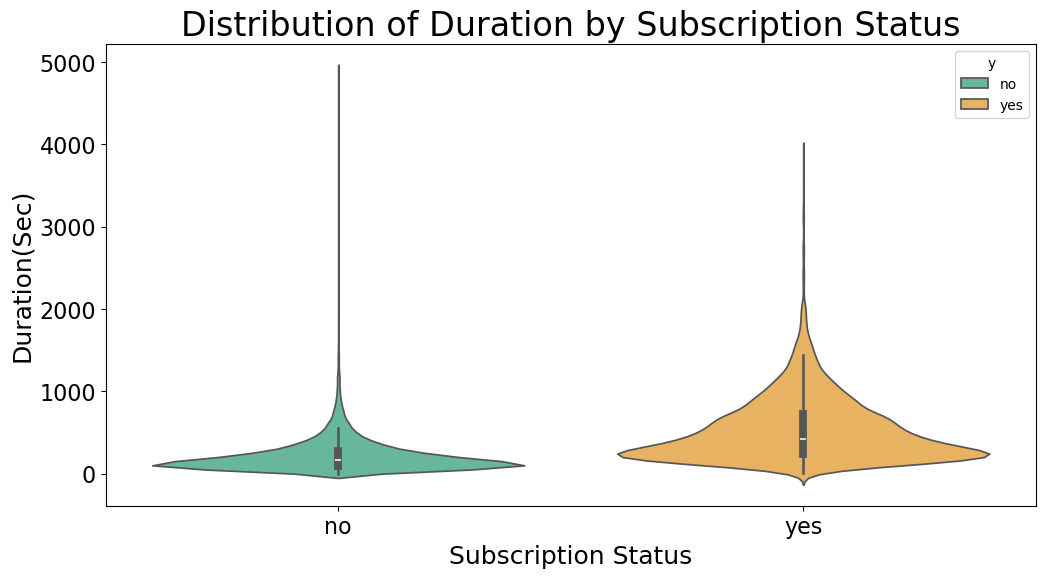

y
no     221.182806
yes    537.294574
Name: duration, dtype: float64

In [15]:
plt.figure(figsize=(12, 6))
custom_palette = {'yes':'#FEB64D', 'no':'#5BC49F'}

sns.violinplot(x='y', y='duration', hue='y' , data=data, palette=custom_palette, dodge=False, legend=True)
plt.xlabel('Subscription Status',fontsize=18)
plt.ylabel('Duration(Sec)',fontsize=18)
plt.title('Distribution of Duration by Subscription Status',fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

average_duration_by_y = data.groupby('y')['duration'].mean()
average_duration_by_y

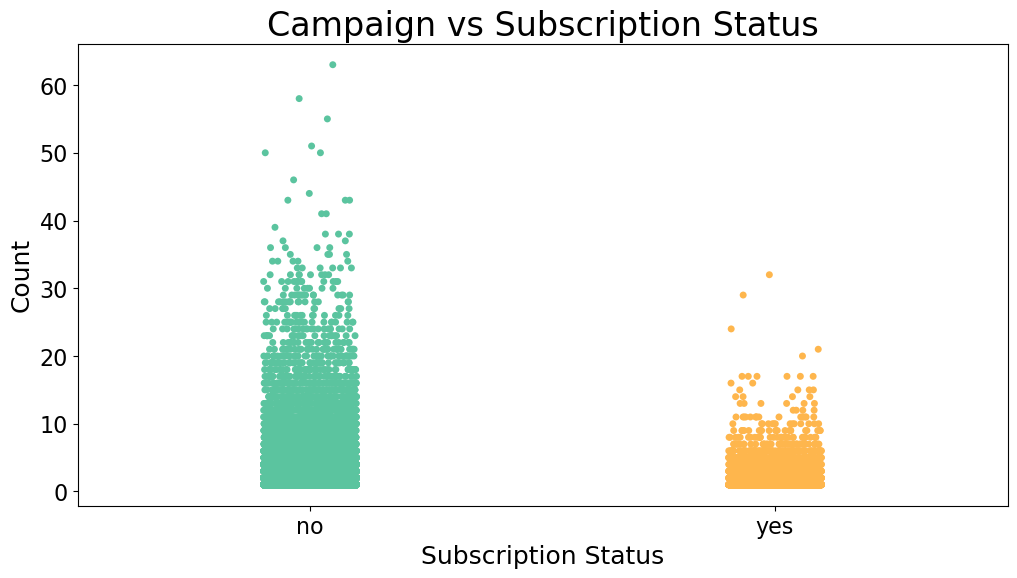

y
no     2.846350
yes    2.141047
Name: campaign, dtype: float64

In [16]:
plt.figure(figsize=(12, 6))
custom_palette = {'yes':'#FEB64D', 'no':'#5BC49F'}
sns.stripplot(x='y', y='campaign', data=data, hue='y',jitter=True, palette=custom_palette)
plt.title('Campaign vs Subscription Status',fontsize=24)
plt.xlabel('Subscription Status',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

average_duration_by_y = data.groupby('y')['campaign'].mean()
average_duration_by_y

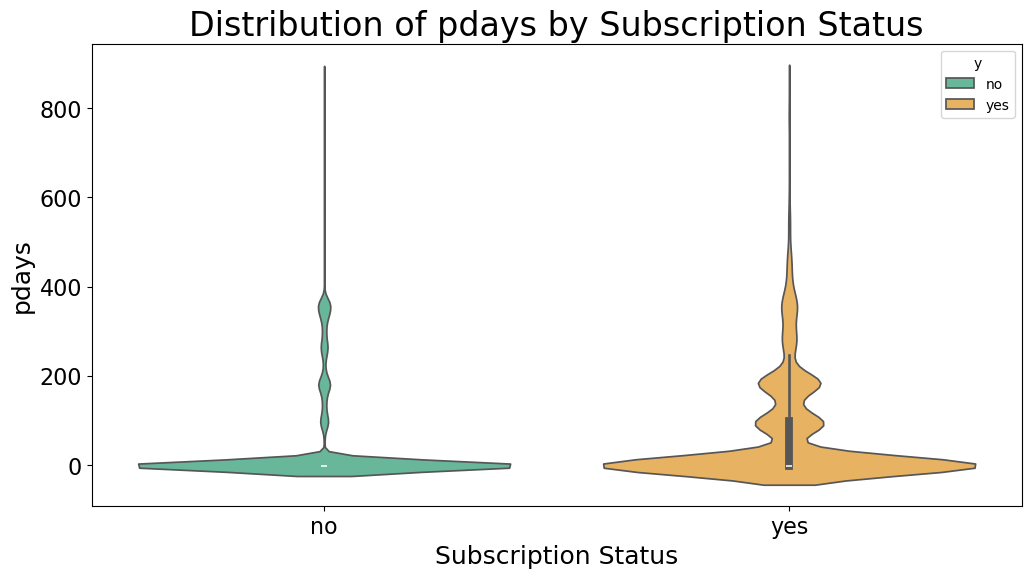

In [17]:
plt.figure(figsize=(12, 6))
custom_palette = {'yes':'#FEB64D', 'no':'#5BC49F'}

sns.violinplot(x='y', y='pdays', hue='y' , data=data, palette=custom_palette, dodge=False, legend=True)
plt.xlabel('Subscription Status',fontsize=18)
plt.ylabel('pdays',fontsize=18)
plt.title('Distribution of pdays by Subscription Status',fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


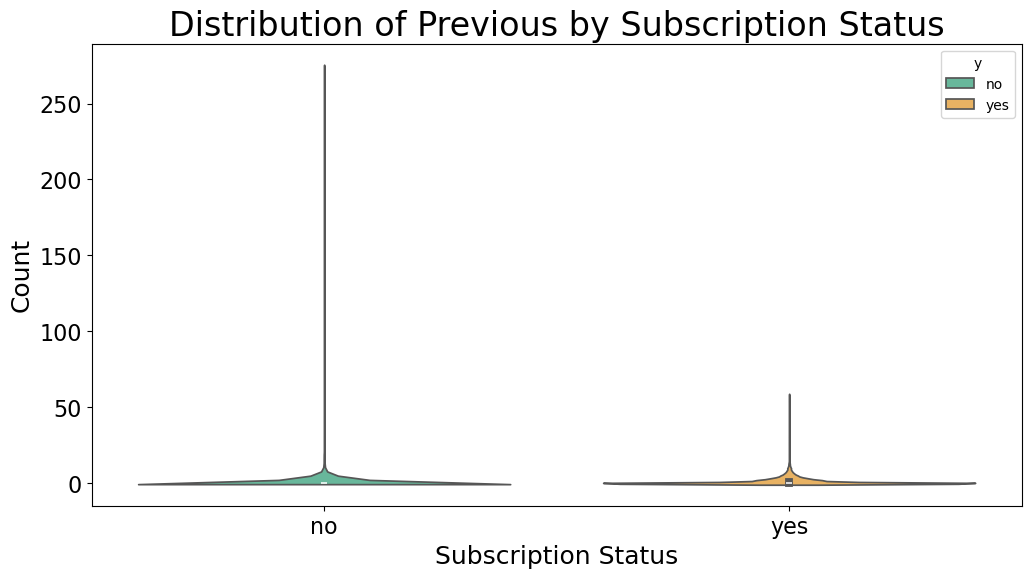

y
no     0.502154
yes    1.170354
Name: previous, dtype: float64

In [18]:
plt.figure(figsize=(12, 6))
custom_palette = {'yes':'#FEB64D', 'no':'#5BC49F'}

sns.violinplot(x='y', y='previous', hue='y' , data=data, palette=custom_palette, dodge=False, legend=True)
plt.xlabel('Subscription Status',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('Distribution of Previous by Subscription Status',fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

average_duration_by_y = data.groupby('y')['previous'].mean()
average_duration_by_y

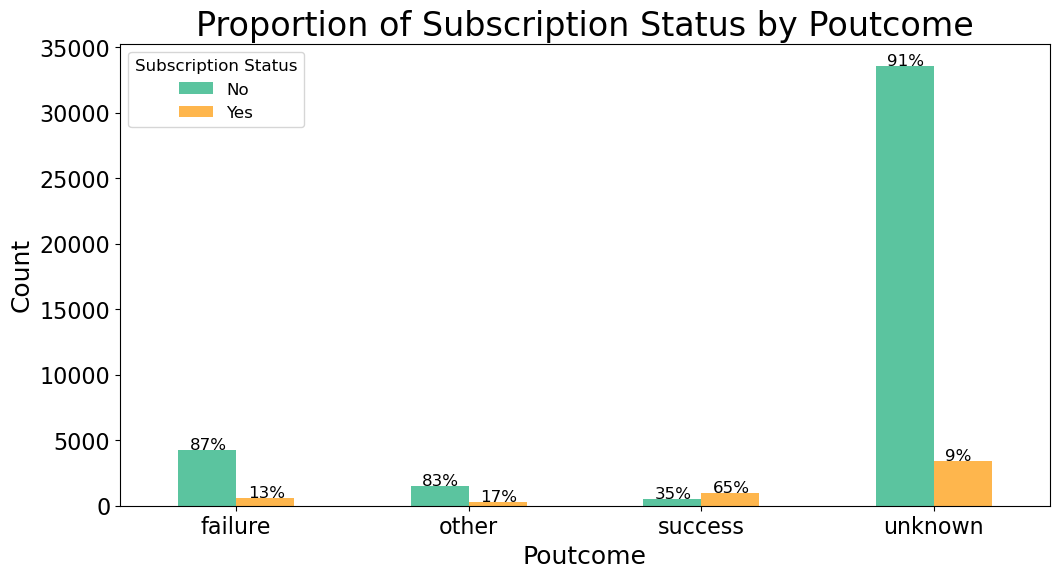

In [19]:
job_y_counts = data.groupby(['poutcome', 'y']).size().unstack(fill_value=0)
job_y_ratio = job_y_counts.div(job_y_counts.sum(axis=1), axis=0)

job_y_counts.plot(kind='bar', stacked=False, color=['#5BC49F', '#FEB64D'], figsize=(12, 6))

#add ratio on bar
for i, (index, row) in enumerate(job_y_counts.iterrows()):
    y_yes = row['yes']
    y_no = row['no']
    percentage_yes = job_y_ratio.loc[index, 'yes'] * 100
    percentage_no = job_y_ratio.loc[index, 'no'] * 100
    
    plt.text(i+0.05 , y_yes+50, f'{percentage_yes:.0f}%', color='black', fontsize=12)
    plt.text(i-0.2 , y_no+50 , f'{percentage_no:.0f}%', color='black', fontsize=12)

plt.xlabel('Poutcome', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Proportion of Subscription Status by Poutcome', fontsize=24)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['No', 'Yes'], title='Subscription Status', title_fontsize='12', fontsize='12')
plt.show()


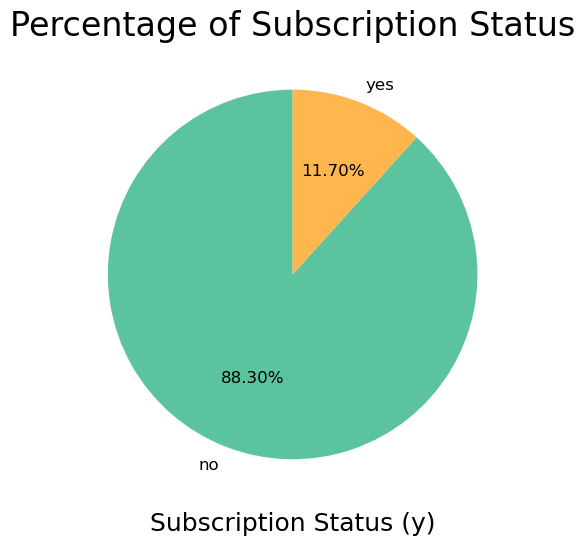

In [10]:
y_counts = data['y'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))
plt.pie(y_counts, labels=y_counts.index, colors=['#5BC49F','#FEB64D'], autopct='%1.2f%%', startangle=90, textprops={'fontsize': 12})

plt.xlabel('Subscription Status (y)', fontsize=18)

plt.title('Percentage of Subscription Status', fontsize=24)
plt.show()

### Data Preprocessing

In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

data_pre = data.copy(deep=True)

#binary class
data_pre['y']=data_pre['y'].apply(lambda x: 1 if x == 'yes' else 0)
data_pre['default']=data_pre['default'].apply(lambda x: 1 if x == 'yes' else 0)
data_pre['housing']=data_pre['housing'].apply(lambda x: 1 if x == 'yes' else 0)
data_pre['loan']=data_pre['loan'].apply(lambda x: 1 if x == 'yes' else 0)

numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education','contact', 'month','day', 'poutcome']

# One-hot encode 
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(data_pre[categorical_features])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(categorical_features))

# Standardize 
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(data_pre[numeric_features])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numeric_features)

# Concatenate the one-hot encoded and Standardize and y 
data_trans = pd.concat([scaled_numerical_df, onehot_encoded_df, data_pre[['default','housing','loan','y']]], axis=1)


#Save
data_trans.to_csv('./data/processed_data.csv', index=False)

### CORR

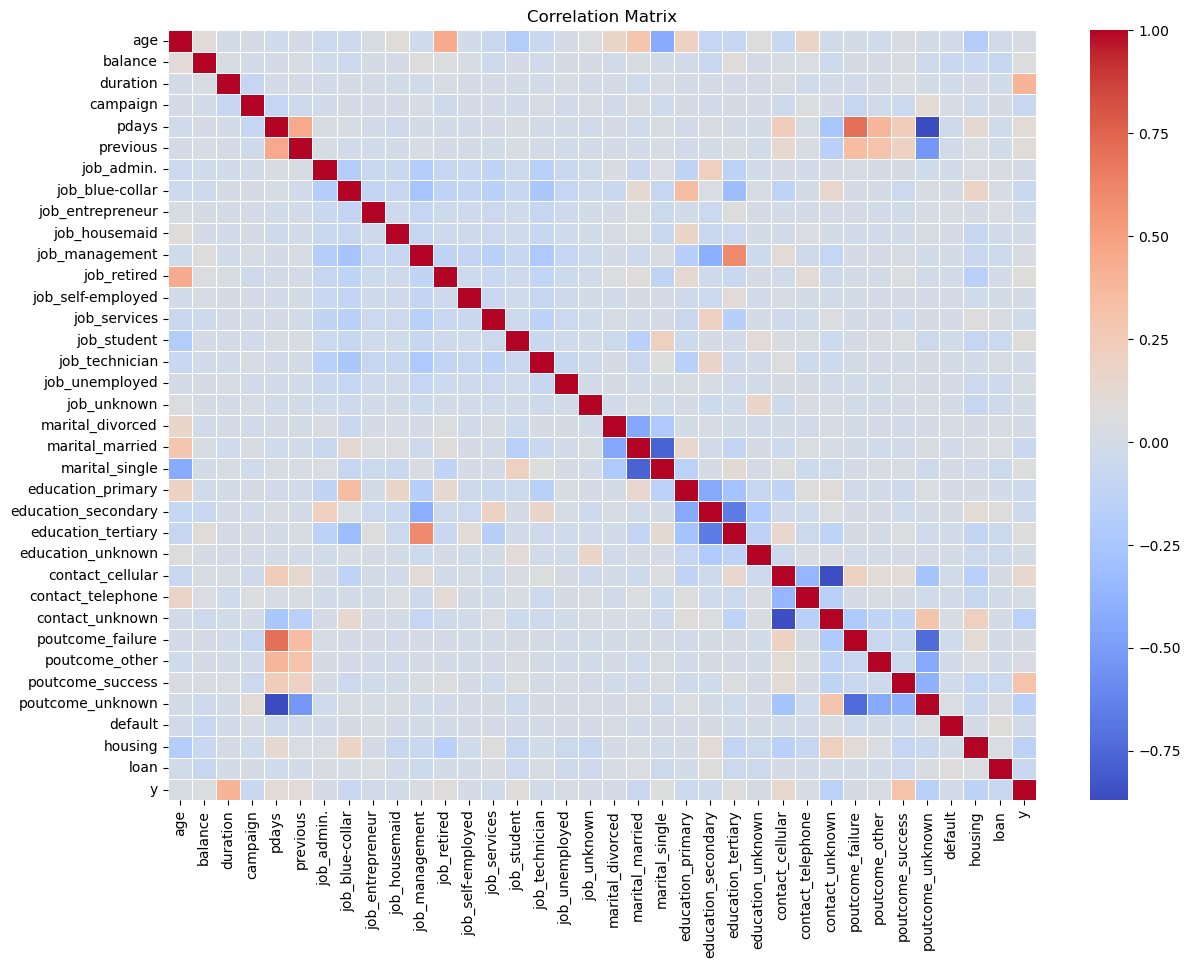

In [22]:
columns=['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
         'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown','poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'default', 'housing', 'loan', 'y']

# Calculating correlation
correlation_matrix = data_trans[columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()